<a href="https://colab.research.google.com/github/hohohohyun/django/blob/master/sent_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import re
import urllib.request
from nltk.tokenize import word_tokenize, sent_tokenize
from math import log
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [3]:
#stock = pd.read_csv('/content/drive/My Drive/stock_data.csv')
L_senti = pd.read_csv('/content/drive/My Drive/train.csv')

In [4]:
#stock

In [5]:
contents = list(np.array(L_senti['text'].tolist()))
label = list(np.array(L_senti['sentiment'].tolist()))
#contents = list(np.array(stock['Text'].tolist()))
cnts_N = contents[:1000]+contents[-1000:]
label_N = label[:1000]+label[-1000:]
#cnts_N = contents[:1000]

In [54]:
label_N[-5:]

[1, 1, 1, 1, 1]

## Preprocessing

In [7]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

In [8]:
script_m = []
for scr in cnts_N:
    scr = re.sub('\(', ' ', scr)
    scr = re.sub('\)', ' ', scr)
    scr = re.sub('[^ a-zA-Zㄱ-힗]', '', scr)
    script_m.append(scr.lower())

In [9]:
len(script_m)

2000

In [10]:
normalized_text = []
for string in script_m:
    tokens = re.sub(r"[^a-z0-9]+", " ", string)
    normalized_text.append(tokens)

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
result = [word_tokenize(sentence) for sentence in normalized_text]

In [13]:
len(result)

2000

In [14]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english')) 

result_stopword = []
for st in result:
    temp = []
    for tk in st:
        if tk not in stop_words: 
            temp.append(tk)
    result_stopword.append(temp)

In [15]:
len(result_stopword)

2000

In [16]:
vocab = list(set(w for i in result_stopword for w in i ))
vocab.sort()

In [17]:
check_freq = []
for line in result_stopword:
    for wd in line:
        check_freq.append(wd)

In [18]:
from nltk import FreqDist
fdist = FreqDist(check_freq)

In [19]:
low_freq = []
for i in vocab:
    if fdist[i] < 4:
        low_freq.append(i)
        
len(low_freq)

20974

In [20]:
stop_words = list(stop_words)
for i in low_freq:
    stop_words.append(i)

final_result = []
for st in result_stopword:
    temp = []
    for tk in st:
        if tk not in stop_words: 
            temp.append(tk)
    final_result.append(temp)

리뷰의 최대 길이 : 707
리뷰의 평균 길이 : 105.589


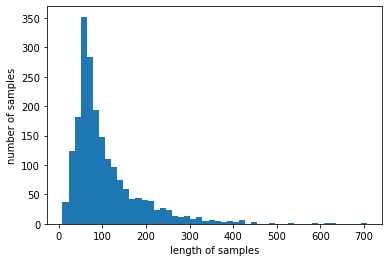

In [21]:
print('리뷰의 최대 길이 :',max(len(l) for l in final_result))
print('리뷰의 평균 길이 :',sum(map(len, final_result))/len(final_result))
plt.hist([len(s) for s in final_result], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
vocab = list(set(w for i in final_result for w in i ))
vocab.sort()

In [23]:
len(vocab)

8039

In [24]:
corp = []
for sent in final_result:
  tmp = " ".join(sent)
  corp.append(tmp)

corp[:3]

['movie gets respect sure lot memorable quotes listed gem imagine movie joe actually funny maureen scene character absolute scream watch alan hale jr police sgt',
 'bizarre horror movie filled famous faces stolen raines later tvs road pretty somewhat unstable model smile pay attempted suicides hell scenes raines well captured mood music perfect charming pal raines moves creepy brooklyn heights inhabited blind priest top floor things really start cooking neighbors including fantastically wicked couple miles beverly diabolical lot great fun police detective movie nearly rosemarys baby combination based jeffrey sentinel spooky full shocks brought well director michael winner ending skill',
 'solid film matthau einstein wonderful favorite part thing would make go way see wonderful scene playing loved conversation waited robbins retrieve']

Word2vec

In [25]:
embedding_size = 1    
mincount = 3    # 최소 n번 이상 나온 단어만 사용

In [26]:
from gensim.models import Word2Vec

w2v_model = Word2Vec(sentences=final_result, size=embedding_size, window=5, min_count=mincount, workers=3, sg=0)

In [27]:
w2v_model.wv.vectors.shape

(8039, 1)

In [28]:
w2v_array = w2v_model.wv.vectors
w2v_array

array([[-3.9749897 ],
       [-4.0974364 ],
       [-4.120848  ],
       ...,
       [-0.2185476 ],
       [-0.82478905],
       [-0.5534719 ]], dtype=float32)

In [29]:
w2v_dict = {}

for i in range(len(vocab)):
  w2v_dict[vocab[i]] = w2v_array[i][0]

In [81]:
#공백과 미학습 단어 처리를 위한 사전 정보 추가  
w2v_dict['_PAD_'] = 0
w2v_dict['_UNK_'] = 1

In [74]:
w2v_dict

{'aaa': -3.9749897,
 'aag': -4.0974364,
 'aaron': -4.120848,
 'abandon': -4.002571,
 'abandoned': -3.9089649,
 'abby': -4.1371903,
 'abc': -4.1352906,
 'abducted': -4.058103,
 'abilities': -3.9485385,
 'ability': -3.9617987,
 'able': -4.2108397,
 'abomination': -3.9439101,
 'abraham': -4.2006063,
 'abrupt': -3.961128,
 'abruptly': -4.0494976,
 'absence': -4.41989,
 'absolute': -4.165423,
 'absolutely': -3.9887774,
 'absurd': -4.221319,
 'absurdity': -4.1998777,
 'abundance': -4.231452,
 'abuse': -4.418778,
 'abused': -4.1954136,
 'abusive': -4.0319815,
 'abysmal': -4.1032815,
 'academy': -4.3484735,
 'accent': -4.035963,
 'accents': -3.9228933,
 'accept': -4.0426154,
 'acceptable': -4.1949587,
 'acceptance': -4.4127684,
 'accepted': -4.11062,
 'accepting': -4.1822696,
 'accepts': -4.0548496,
 'access': -4.2846556,
 'accessible': -4.5272145,
 'accident': -4.0287237,
 'accidentally': -4.311896,
 'acclaimed': -4.3342714,
 'accompanied': -4.2350965,
 'accomplish': -4.225854,
 'accomplished

In [82]:
#키워드를 역추적하기 위한 사전 생성 
w2v_rev_dict = dict([(v,k) for k, v in w2v_dict.items()])

In [83]:
from keras.preprocessing.sequence import pad_sequences

In [102]:
def encoding_and_padding(corp_list, dic, max_seq):
    coding_seq = [ [dic.get(j, dic['_UNK_']) for j in i]  for i in corp_list ]
    #일반적으로 리뷰는 마지막 부분에 많은 정보를 포함할 가능성이 많아 패딩은 앞에 준다. 
    return(pad_sequences(coding_seq, maxlen=max_seq, padding='pre', truncating='pre', dtype=float ,value=dic['_PAD_']))

In [103]:
train_x = encoding_and_padding(corp, w2v_dict, max_seq=50)

In [104]:
train_x[:5]

array([[-2.91969514,  1.        , -1.45908225, -0.73153555,  1.        ,
         1.        , -3.44727874,  1.        ,  1.        , -0.94002485,
        -0.80262792,  1.        , -1.45908225,  1.        ,  1.        ,
        -2.91969514, -0.73153555, -1.45908225,  1.        ,  1.        ,
         1.        , -0.63892108,  1.        ,  1.        , -2.91969514,
        -0.89530098,  1.        ,  1.        , -0.94002485,  1.        ,
        -0.71401638,  1.        , -0.89530098,  1.        , -0.94002485,
        -1.45908225,  1.        , -0.47048864, -0.73153555,  1.        ,
        -0.65729159,  1.        , -0.94002485,  1.        , -2.91969514,
        -1.45908225,  1.        ,  1.        , -1.35290885,  1.        ],
       [ 1.        , -3.44727874, -0.73153555,  1.        , -0.80262792,
        -1.35290885, -0.89530098,  1.        ,  1.        , -0.63892108,
        -1.45908225, -0.94002485, -0.94002485,  1.        ,  1.        ,
         1.        , -0.73153555, -1.45908225, -2.

In [105]:
train_y = np.array(label_N)

In [106]:
train_x.shape, train_y.shape

((2000, 50), (2000,))

Grad - CAM

In [38]:
from keras.models import *
from keras.layers import *
from keras.utils import *
from keras.optimizers import *
from keras.callbacks import *
from keras.layers import merge
from keras.layers.core import *
from keras.layers.recurrent import LSTM
from keras.models import *
import keras.backend as K

In [107]:
x_dim = train_x.shape[1]

In [129]:
model = Sequential()
model.add(Embedding(input_dim=len(w2v_dict) , output_dim= embedding_size, input_length = x_dim))
model.add(Conv1D(filters=32, kernel_size=1, activation='relu', padding = 'same'))
model.add(AveragePooling1D())
model.add(Conv1D(filters=16, kernel_size=2, activation='relu', padding = 'same'))
model.add(AveragePooling1D())
model.add(Conv1D(filters=8, kernel_size=3, activation='relu', padding = 'same'))
model.add(AveragePooling1D())
# model.add(concatenate(model))
model.add(Bidirectional(GRU(10, recurrent_dropout=0.2, dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss="categorical_crossentropy",optimizer='rmsprop', metrics=["acc"])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 50, 1)             8041      
_________________________________________________________________
conv1d_60 (Conv1D)           (None, 50, 32)            64        
_________________________________________________________________
average_pooling1d_59 (Averag (None, 25, 32)            0         
_________________________________________________________________
conv1d_61 (Conv1D)           (None, 25, 16)            1040      
_________________________________________________________________
average_pooling1d_60 (Averag (None, 12, 16)            0         
_________________________________________________________________
conv1d_62 (Conv1D)           (None, 12, 8)             392       
_________________________________________________________________
average_pooling1d_61 (Averag (None, 6, 8)            

In [ ]:
# inputs = Input(shape=(train_x.shape[1],), name='input')
# embeddings_out = Embedding(input_dim=len(w2v_dict), output_dim=1,name='embedding')(inputs)
# conv0 = Conv1D(32, 1, padding='same')(embeddings_out)
# conv1 = Conv1D(16, 2, padding='same')(embeddings_out)
# conv2 = Conv1D(8, 3, padding='same')(embeddings_out)
# pool0 = AveragePooling1D()(conv0)
# pool1 = AveragePooling1D()(conv1)
# pool2 = AveragePooling1D()(conv2)
# concat_layer = concatenate([pool0, pool1, pool2],axis=2)
# bidir =Bidirectional(GRU(10, recurrent_dropout=0.2, dropout=0.2))(concat_layer)
# out = Dense(1,activation='sigmoid')(bidir)
# model = Model(inputs=[inputs,], outputs=out)
# model.summary()
# model.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [134]:
hist = model.fit(x=train_x,y=train_y, batch_size=100, epochs=10, validation_split=0.1)

Epoch 1/10


InvalidArgumentError: ignored

TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corp)
tfidf_ = tfidfv.transform(corp).toarray()

In [ ]:
colnames = list(tfidfv.vocabulary_.keys())

In [ ]:
tfidf_.shape

In [ ]:
tfidf_matrix = pd.DataFrame(tfidf_, columns = colnames)
tfidf_matrix

Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, label_N,

                                                    test_size = 0.2, random_state=0)



In [ ]:
tree = DecisionTreeClassifier(random_state=0)

tree.fit(x_train, y_train)

In [ ]:
feature_imp = tree.feature_importances_

In [ ]:
import numpy as np

n_feature = tfidf_.shape[1]

idx = np.arange(n_feature)

plt.figure(figsize=(20,30))

plt.barh(idx, feature_imp, align='center')

plt.yticks(idx, colnames)

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()